# Global mean time series

This notebook shows how to use the global-mean timeseries diagnostic.

The `Timeseries` class provides an easy interface to plot gloabl time series for a given list of experiments and a variable or formula.

In [3]:
from global_time_series import Timeseries

Let's plot the global mean temperature for the historical experiment, with a comparison done with the same ERA5 time span and 1990-1999 climatology.

In [4]:
ts = Timeseries(var='2t', models='IFS-NEMO', exps='historical-1990', sources='lra-r100-monthly',
                startdate='1990-01-01', enddate='1999-12-31',
                std_startdate='1990-01-01', std_enddate='1999-12-31',
                loglevel='INFO')

By default the `Timeseries` class will use `ERA5` as the reference dataset, but you can change it by setting the `plot_ref_kw` parameter to the desired dataset.

The timeseries is generated, plot and saved by running the `run` method of the `Timeseries` class.

2024-02-20 12:01:49 :: Timeseries :: INFO     -> Retrieving data for IFS-NEMO historical-1990 lra-r100-monthly
2024-02-20 12:01:50 :: Reader :: INFO     -> No specific fix found, will call the default fix IFS-NEMO-default
2024-02-20 12:01:50 :: Reader :: WARNING  -> The requested default fixer name IFS-NEMO-default does not exist in fixes files
2024-02-20 12:01:50 :: Reader :: WARNING  -> No fixes available for model IFS-NEMO, experiment historical-1990, source lra-r100-monthly
2024-02-20 12:01:50 :: Reader :: INFO     -> Grid metadata is lon-lat
2024-02-20 12:01:55 :: Reader :: INFO     -> Retrieving variables: ['2t']
2024-02-20 12:02:24 :: Timeseries :: INFO     -> Monthly data retrieved
2024-02-20 12:02:24 :: Reader :: INFO     -> Resampling to YS frequency...
2024-02-20 12:02:24 :: Reader :: INFO     -> Checking if incomplete chunks has been produced...
2024-02-20 12:02:24 :: timmean_chunk_completeness :: INFO     -> 10 chunks from 1990-01-01 00:00:00 to 1999-01-01 00:00:00 at YS f

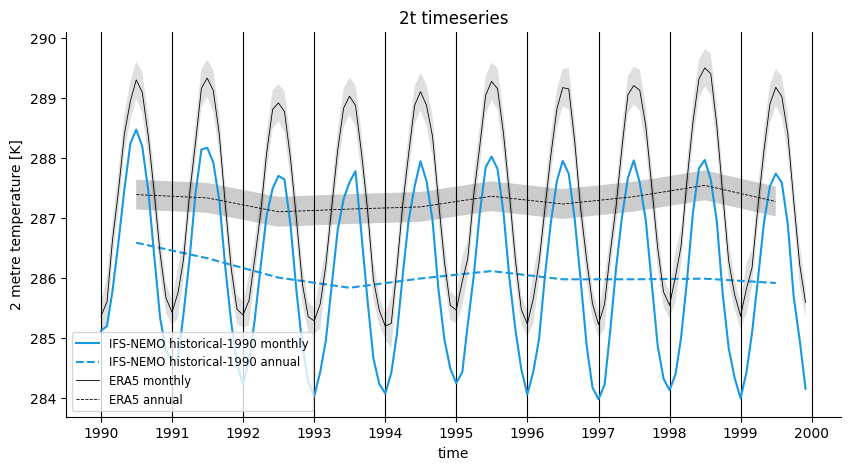

In [5]:
ts.run()

Furthermore, the user can also combine time series and plot them against each other. The resulting "Gregory"-like plot allows the user to investigate the annual cycle as well as to detect model drift (if existing).

In [2]:
from global_time_series import GregoryPlot

Also in this case we have a simple class defined. The `GregoryPlot` class provides an easy interface to plot the Gregory-like plot for a given list of experiments.

The comparison is done against ERA5 for the 2m temperature and CERES for the TOA net fluxes.

By default both monthly and annual cycles are plotted, but the user can choose to plot only one of them by setting the `monthly` and `annual` parameters to `True` or `False`.

In [28]:
gp = GregoryPlot(models=['IFS-NEMO','IFS-NEMO'], exps=['historical-1990', 'ssp370'], sources=['lra-r100-monthly', 'lra-r100-monthly'],
            loglevel='INFO', monthly=True, annual=True)

2024-02-20 14:29:48 :: Gregory plot :: INFO     -> Retrieving data for IFS-NEMO historical-1990 lra-r100-monthly


2024-02-20 14:29:48 :: Reader :: INFO     -> No specific fix found, will call the default fix IFS-NEMO-default
2024-02-20 14:29:48 :: Reader :: WARNING  -> The requested default fixer name IFS-NEMO-default does not exist in fixes files
2024-02-20 14:29:48 :: Reader :: WARNING  -> No fixes available for model IFS-NEMO, experiment historical-1990, source lra-r100-monthly
2024-02-20 14:29:49 :: Reader :: INFO     -> Grid metadata is lon-lat
2024-02-20 14:29:49 :: Reader :: INFO     -> Retrieving variables: ['2t', 'mtnlwrf', 'mtnswrf']
2024-02-20 14:29:57 :: Reader :: INFO     -> Resampling to YS frequency...
2024-02-20 14:29:57 :: Reader :: INFO     -> Checking if incomplete chunks has been produced...
2024-02-20 14:29:57 :: timmean_chunk_completeness :: INFO     -> 12 chunks from 1990-01-01 00:00:00 to 2001-01-01 00:00:00 at YS frequency to be analysed...
2024-02-20 14:29:57 :: timmean_chunk_completeness :: WARNING  -> Chunk 2001-01-31 00:00:00->2001-12-31 00:00:00 for has 5 elements ins

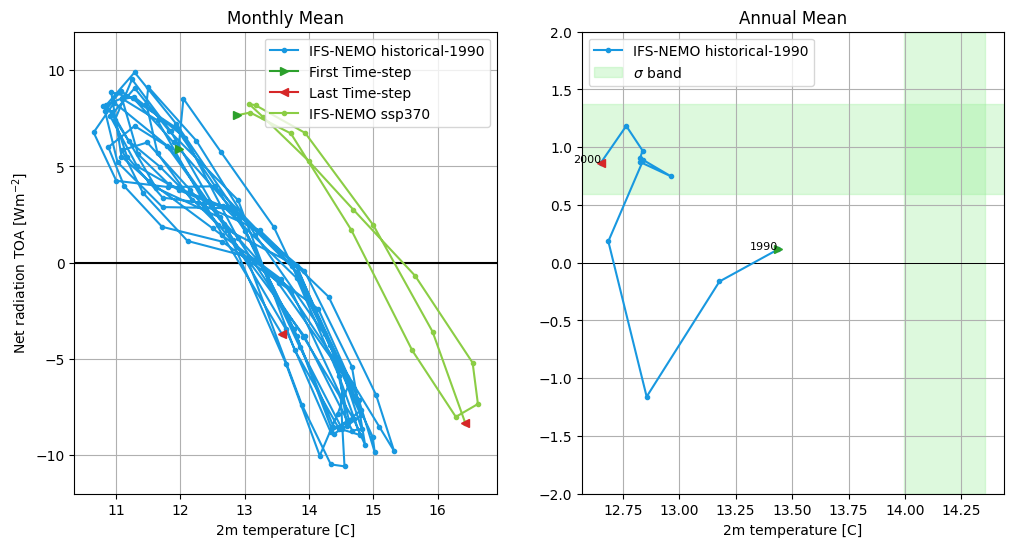

In [29]:
gp.run()